# 10wk-2: Plotly – 판다스 백엔드

최규빈  
2023-11-08

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/10wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wRSxUUDXqCXNhSNiQeVrTP&si=jec_79XD9crgQZwZ>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd 
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"
print(pio.templates)

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']


# 3. 여러가지 플랏

## A. `.plot.bar()`

`# 예제1` – 성별 합격률 시각화

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df

In [4]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    width=600
)

`#`

`# 예제2` – (성별,학과)별 지원자수 시각화

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df

In [6]:
df.groupby(['department','gender']).agg({'count':'sum'})\
.reset_index()\
.plot.bar(
    x='gender',y='count',
    color='gender',
    text='count',
    facet_col='department'
)

`#`

## B. `.plot.line()`

`# 예제1` – 핸드폰 판매량

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

In [8]:
df.melt(id_vars='Date')\
.set_axis(['날짜','회사','판매량'],axis=1)\
.plot.line(
    x='날짜',y='판매량',
    color='회사'
)

`#`

## C. `.plot.scatter()`

In [9]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.loc[:,lambda df: df.isna().mean()<0.5].dropna()\
.assign(Position = lambda df: df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))\
.assign(Wage = lambda df: df.Wage.str[1:].str.replace('K','000').astype(int))
df

In [10]:
df.columns

In [11]:
df.query('Position =="FORWARD" or Position =="DEFENDER"')\
.plot.scatter(
    x='ShotPower',y='SlidingTackle',
    color='Position',
    size='Wage',
    opacity=0.5,
    width=600,
    hover_data=['Name','Age']
)

## D. `.plot.box()`

`# 예제1` – 전북고등학교

In [12]:
y1=[75,75,76,76,77,77,78,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,79,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

In [13]:
df = pd.DataFrame({
    'score':y1+y2,
    'class':['A']*len(y1) + ['B']*len(y2)
})
df.plot.box(
    x='class',y='score',
    color='class',
    points='all',
    width=600
)

`#`

`# 예제2` – (년도,시도)별 전기에너지사용량

In [14]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'
prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)\
.assign(년도 = lambda df: df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index()
df.head()

/tmp/ipykernel_2984274/3228750770.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [15]:
df.plot.box(
    x='시도',y='에너지사용량(TOE)/전기',
    color='시도',
    facet_row='년도',
    hover_data=['지역','연면적'],
    height=1600
)

`#`

## E. `.plot.hist()`

`# 예제1` – 타이타닉: (연령,성별) 생존자

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")
df

In [17]:
df.plot.hist(
    x='Age',
    color='Sex',
    facet_row='Sex',facet_col='Survived'
)

`#`

## F. `.plot.area()`

`# 예제1` – 핸드폰 판매량

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

In [19]:
df.melt(id_vars='Date')\
.set_axis(['날짜','회사','판매량'],axis=1)\
.plot.area(
    x='날짜',y='판매량',
    color='회사',
    width=600
)

`#`

`# 예제2` – 에너지사용량

In [20]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'
prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)\
.assign(년도 = lambda df: df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index()
df.head()

/tmp/ipykernel_2984274/3228750770.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [21]:
df.set_index(['년도','시도','지역','건물동수','연면적']).stack().reset_index()\
.rename({'level_5':'에너지종류', 0:'에너지사용량'},axis=1)\
.assign(에너지종류 = lambda df: df['에너지종류'].str.split('/').str[-1])\
.groupby(['년도','시도','에너지종류']).agg({'에너지사용량':'sum'})\
.stack().reset_index()\
.rename({0:'에너지사용량'},axis=1)\
.plot.area(
    x='년도',y='에너지사용량',
    color='시도',
    facet_col='에너지종류'
)

------------------------------------------------------------------------

***간단한 미세조정***

In [22]:
fig = df.set_index(['년도','시도','지역','건물동수','연면적']).stack().reset_index()\
.rename({'level_5':'에너지종류', 0:'에너지사용량'},axis=1)\
.assign(에너지종류 = lambda df: df['에너지종류'].str.split('/').str[-1])\
.groupby(['년도','시도','에너지종류']).agg({'에너지사용량':'sum'})\
.stack().reset_index()\
.rename({0:'에너지사용량'},axis=1)\
.plot.area(
    x='년도',y='에너지사용량',
    color='시도',
    facet_col='에너지종류'
)
fig.update_layout(
    xaxis_domain=[0.0, 0.25],
    xaxis2_domain=[0.35, 0.60],
    xaxis3_domain=[0.70, 0.95]
)

# 4. HW

아래의 코드를 활용하여 Kaggle의
[HRdataset](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)을
불러오고 물음에 답하라.

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

아래와 같은 시각화를 하라. (`Employee_Name`이 보이도록 할 것)

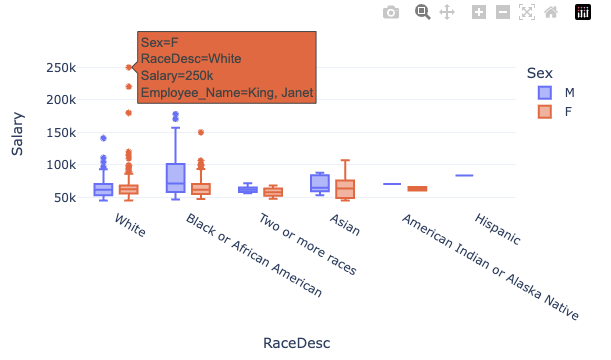